<a href="https://colab.research.google.com/github/ybii22/Machine-Learning/blob/main/week%208%20-%2016/Chapter_8_%E2%80%93_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "dim_reduction"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# **PCA**

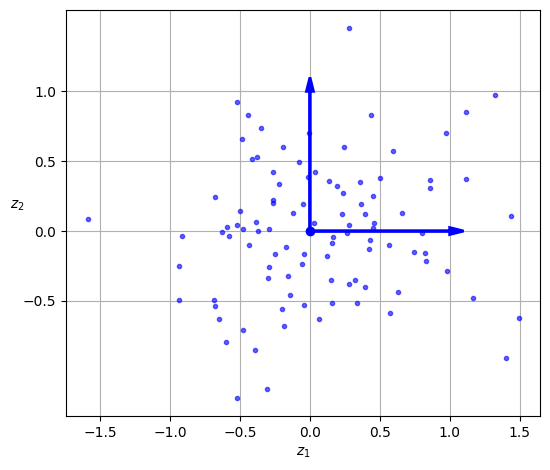

In [4]:
import matplotlib.pyplot as plt
import numpy as np

X2D = np.random.randn(100, 2) * 0.5

def save_fig(fig_id, tight_layout=True):
    path = f"{fig_id}.png"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect='equal')
ax.plot(X2D[:, 0], X2D[:, 1], "b.", alpha=0.6)  # titik biru
ax.plot([0], [0], "bo")  # origin
ax.arrow(0, 0, 1, 0, head_width=0.05, head_length=0.1,
         fc='b', ec='b', linewidth=2)  # vektor arah z1
ax.arrow(0, 0, 0, 1, head_width=0.05, head_length=0.1,
         fc='b', ec='b', linewidth=2)  # vektor arah z2
ax.set_xlabel("$z_1$")
ax.set_ylabel("$z_2$", rotation=0)
ax.set_yticks([-0.5, 0, 0.5, 1])
ax.set_axisbelow(True)
ax.grid(True)

save_fig("dataset_2d_plot")
plt.show()


In [5]:
from sklearn.datasets import make_swiss_roll

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

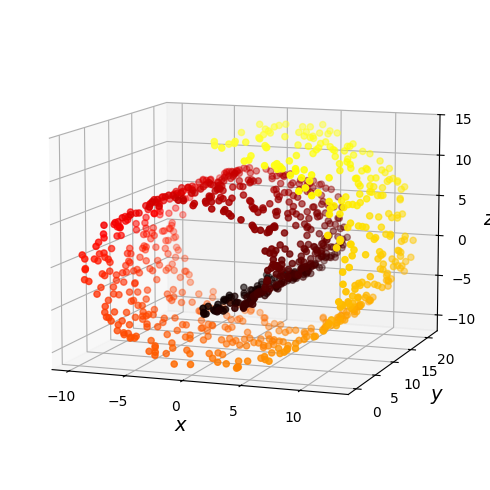

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D

# Fungsi untuk menyimpan gambar
def save_fig(fig_id, tight_layout=True):
    if tight_layout:
        plt.tight_layout()
    plt.savefig(f"{fig_id}.png", format='png', dpi=300)

# Fungsi untuk mengatur sumbu 3D
def set_xyz_axes(ax, axes):
    ax.set_xlim(axes[0], axes[1])
    ax.set_ylim(axes[2], axes[3])
    ax.set_zlim(axes[4], axes[5])
    ax.set_xlabel("$x$", fontsize=14)
    ax.set_ylabel("$y$", fontsize=14)
    ax.set_zlabel("$z$", fontsize=14)

# Generate Swiss roll dataset (jika belum punya X_swiss dan t)
X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

# Colormap custom
darker_hot = ListedColormap(plt.cm.hot(np.linspace(0, 0.8, 256)))

# Plot
axes = [-11.5, 14, -2, 23, -12, 15]
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=t, cmap=darker_hot)
ax.view_init(10, -70)
set_xyz_axes(ax, axes)
save_fig("swiss_roll_plot")
plt.show()


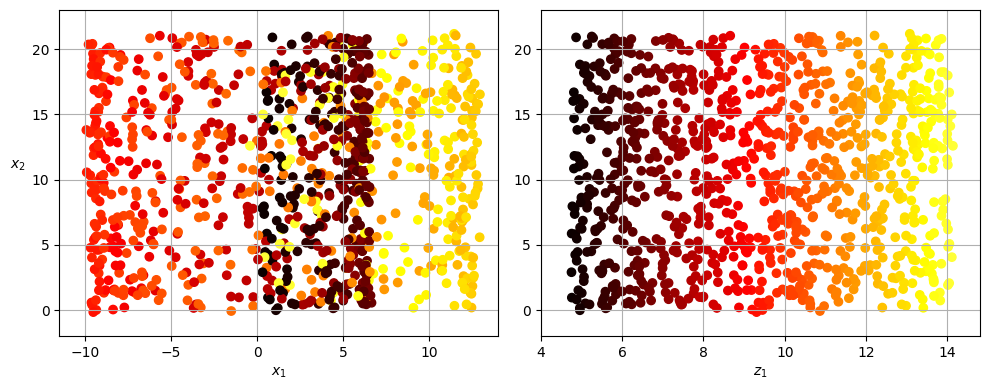

In [7]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.scatter(X_swiss[:, 0], X_swiss[:, 1], c=t, cmap=darker_hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", labelpad=10, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X_swiss[:, 1], c=t, cmap=darker_hot)
plt.axis([4, 14.8, axes[2], axes[3]])
plt.xlabel("$z_1$")
plt.grid(True)

save_fig("squished_swiss_roll_plot")
plt.show()

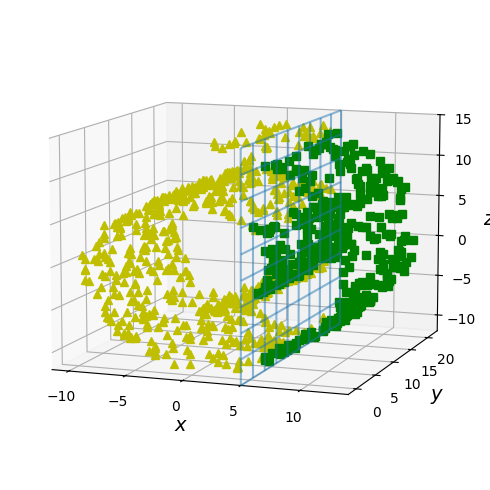

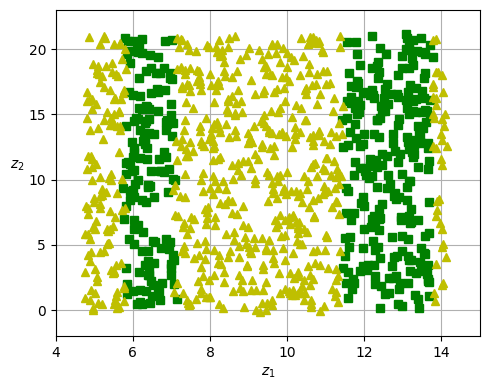

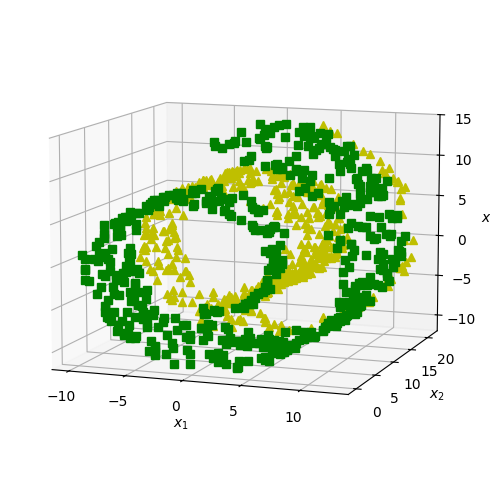

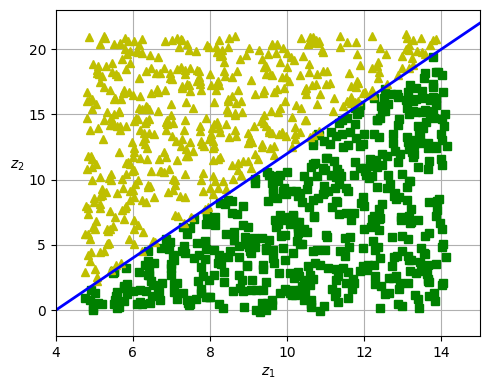

In [8]:
axes = [-11.5, 14, -2, 23, -12, 15]
x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

positive_class = X_swiss[:, 0] > 5
X_pos = X_swiss[positive_class]
X_neg = X_swiss[~positive_class]

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
set_xyz_axes(ax, axes)
save_fig("manifold_decision_boundary_plot1")
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(1, 1, 1)
ax.plot(t[positive_class], X_swiss[positive_class, 1], "gs")
ax.plot(t[~positive_class], X_swiss[~positive_class, 1], "y^")
ax.axis([4, 15, axes[2], axes[3]])
ax.set_xlabel("$z_1$")
ax.set_ylabel("$z_2$", rotation=0, labelpad=8)
ax.grid(True)
save_fig("manifold_decision_boundary_plot2")
plt.show()

positive_class = 2 * (t[:] - 4) > X_swiss[:, 1]
X_pos = X_swiss[positive_class]
X_neg = X_swiss[~positive_class]

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)
ax.set_xlabel("$x_1$", rotation=0)
ax.set_ylabel("$x_2$", rotation=0)
ax.set_zlabel("$x_3$", rotation=0)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
save_fig("manifold_decision_boundary_plot3")
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(1, 1, 1)
ax.plot(t[positive_class], X_swiss[positive_class, 1], "gs")
ax.plot(t[~positive_class], X_swiss[~positive_class, 1], "y^")
ax.plot([4, 15], [0, 22], "b-", linewidth=2)
ax.axis([4, 15, axes[2], axes[3]])
ax.set_xlabel("$z_1$")
ax.set_ylabel("$z_2$", rotation=0, labelpad=8)
ax.grid(True)
save_fig("manifold_decision_boundary_plot4")
plt.show()

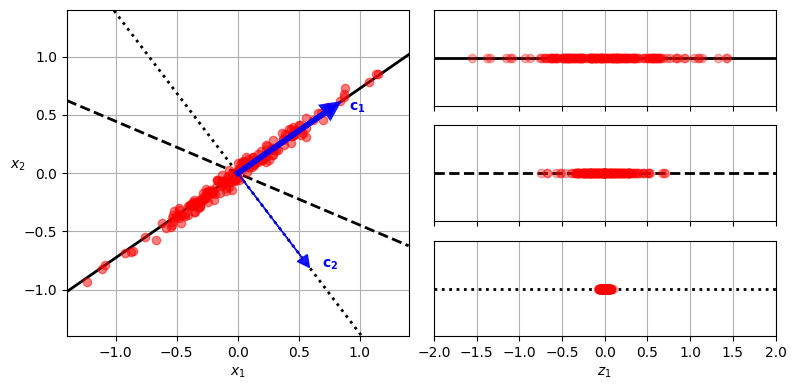

In [9]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X_line = np.random.randn(m, 2) / 10
X_line = X_line @ np.array([[stretch, 0], [0, 1]])  # stretch
X_line = X_line @ [[np.cos(angle), np.sin(angle)],
                   [np.sin(angle), np.cos(angle)]]  # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi / 6), np.sin(angle - 2 * np.pi / 6)])
u3 = np.array([np.cos(angle - np.pi / 2), np.sin(angle - np.pi / 2)])

X_proj1 = X_line @ u1.reshape(-1, 1)
X_proj2 = X_line @ u2.reshape(-1, 1)
X_proj3 = X_line @ u3.reshape(-1, 1)

plt.figure(figsize=(8, 4))
plt.subplot2grid((3, 2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4 * u1[1] / u1[0], 1.4 * u1[1] / u1[0]], "k-",
         linewidth=2)
plt.plot([-1.4, 1.4], [-1.4 * u2[1] / u2[0], 1.4 * u2[1] / u2[0]], "k--",
         linewidth=2)
plt.plot([-1.4, 1.4], [-1.4 * u3[1] / u3[0], 1.4 * u3[1] / u3[0]], "k:",
         linewidth=2)
plt.plot(X_line[:, 0], X_line[:, 1], "ro", alpha=0.5)
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=4, alpha=0.9,
          length_includes_head=True, head_length=0.1, fc="b", ec="b", zorder=10)
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=1, alpha=0.9,
          length_includes_head=True, head_length=0.1, fc="b", ec="b", zorder=10)
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", color="blue")
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", color="blue")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.grid()

plt.subplot2grid((3, 2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=2)
plt.plot(X_proj1[:, 0], np.zeros(m), "ro", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid()

plt.subplot2grid((3, 2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=2)
plt.plot(X_proj2[:, 0], np.zeros(m), "ro", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid()

plt.subplot2grid((3, 2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "ro", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$")
plt.grid()

save_fig("pca_best_projection_plot")
plt.show()

# **Principal Components**

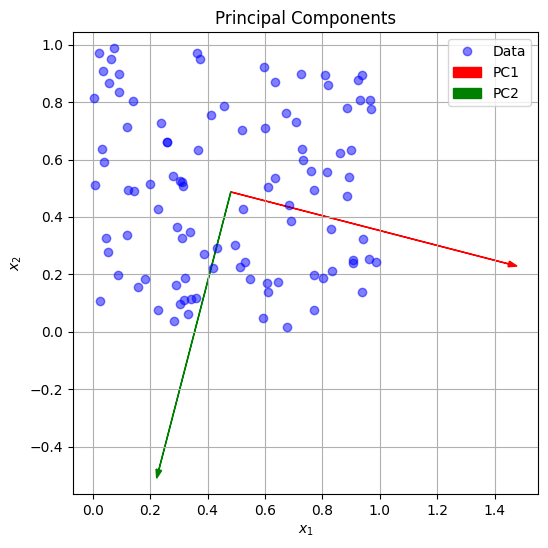

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Contoh data X (bisa diganti dengan dataset lain sesuai kebutuhan)
np.random.seed(42)
X = np.random.rand(100, 2)

# Langkah PCA manual
X_centered = X - X.mean(axis=0)  # Sentralisasi data
U, s, Vt = np.linalg.svd(X_centered)  # Singular Value Decomposition
c1 = Vt.T[:, 0]  # Komponen utama pertama
c2 = Vt.T[:, 1]  # Komponen utama kedua

# Visualisasi
plt.figure(figsize=(6, 6))
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.arrow(X.mean(0)[0], X.mean(0)[1], c1[0], c1[1],
          color='r', head_width=0.02, label='PC1')
plt.arrow(X.mean(0)[0], X.mean(0)[1], c2[0], c2[1],
          color='g', head_width=0.02, label='PC2')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Principal Components")
plt.axis("equal")
plt.grid(True)
plt.legend(["Data", "PC1", "PC2"])
plt.show()


# **Projecting Down to d Dimensions**

In [11]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

# **Using Scikit-Learn**

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

# **Explained Variance Ratio**

In [13]:
pca.explained_variance_ratio_

array([0.53882594, 0.46117406])

# **Choosing the Right Number of Dimensions**

In [14]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# 1. Ambil data
iris = load_iris()
X = iris.data

# 2. Bagi ke train dan test
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# 3. PCA tanpa batas jumlah komponen
pca = PCA()
pca.fit(X_train)

# 4. Hitung jumlah komponen yang dibutuhkan untuk 95% variansi
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

print("Jumlah komponen PCA untuk menjelaskan ≥95% variansi:", d)


Jumlah komponen PCA untuk menjelaskan ≥95% variansi: 2


In [15]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

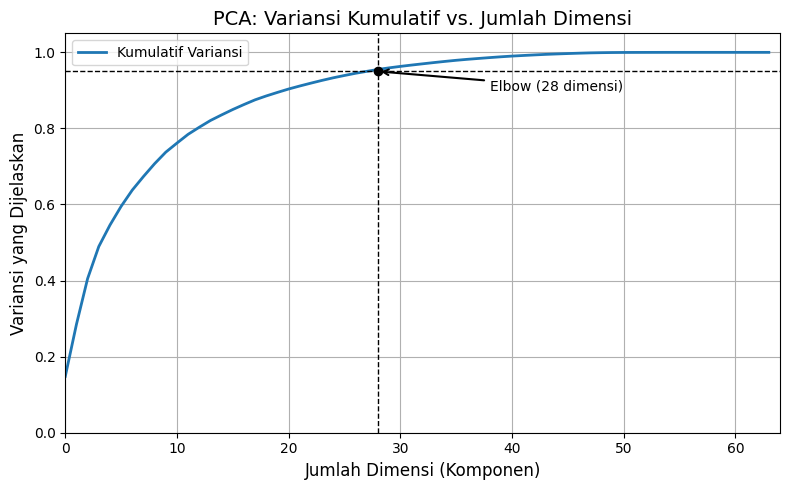

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Load data dan siapkan PCA
digits = load_digits()
X = digits.data

# Split data
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# PCA training
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1  # threshold 95%

# Plot
plt.figure(figsize=(8, 5))
plt.plot(cumsum, linewidth=2, label="Kumulatif Variansi")
plt.xlabel("Jumlah Dimensi (Komponen)", fontsize=12)
plt.ylabel("Variansi yang Dijelaskan", fontsize=12)
plt.title("PCA: Variansi Kumulatif vs. Jumlah Dimensi", fontsize=14)

# Garis bantu 95%
plt.axhline(y=0.95, color='k', linestyle="--", linewidth=1)
plt.axvline(x=d, color='k', linestyle="--", linewidth=1)
plt.plot(d, 0.95, "ko")  # titik elbow
plt.annotate("Elbow ({} dimensi)".format(d),
             xy=(d, 0.95), xytext=(d+10, 0.90),
             arrowprops=dict(arrowstyle="->", lw=1.5),
             fontsize=10)

plt.axis([0, len(cumsum), 0, 1.05])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# **PCA for Compression**

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=64)

X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)


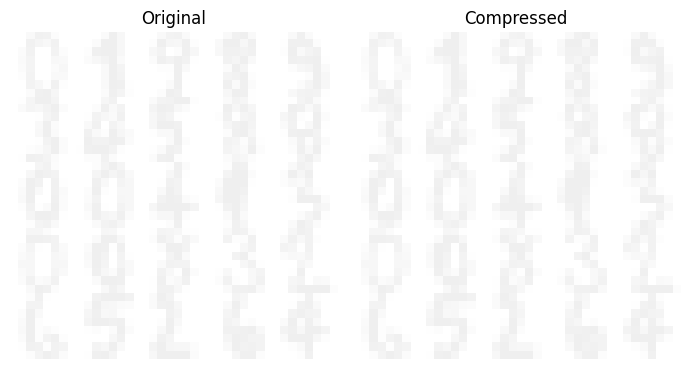

In [18]:
plt.figure(figsize=(7, 4))
for idx, X_batch in enumerate((X_train[:25], X_recovered[:25])):
    plt.subplot(1, 2, idx + 1)
    plt.title(["Original", "Compressed"][idx])
    for row in range(5):
        for col in range(5):
            image = X_batch[row * 5 + col].reshape(8, 8)
            plt.imshow(image, cmap="binary", vmin=0, vmax=255,
                       extent=(row, row + 1, col, col + 1))
    plt.axis([0, 5, 0, 5])
    plt.axis("off")
plt.tight_layout()
plt.show()


# **Randomized PCA**

In [19]:
from sklearn.decomposition import PCA

rnd_pca = PCA(n_components=64, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)
print(X_train.shape)  # (n_samples, n_features)

(1437, 64)


# **Incremental PCA**

In [20]:
from sklearn.decomposition import IncrementalPCA
import numpy as np

n_batches = 10
n_components = 60
inc_pca = IncrementalPCA(n_components=n_components)

for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

In [21]:
X_train = np.random.rand(1000, 50).astype("float32")  # atau data aslimu
X_train.tofile("data_mmap.dat")


In [22]:
m, n = X_train.shape
filename = "data_mmap.dat"
X_mm = np.memmap(filename, dtype="float32", mode="r", shape=(m, n))


In [23]:
from sklearn.decomposition import IncrementalPCA

n_components = 50  # Harus ≤ n
batch_size = m // 20  # contoh 20 batch

inc_pca = IncrementalPCA(n_components=n_components, batch_size=batch_size)
inc_pca.fit(X_mm)


IncrementalPCA(batch_size=50, n_components=50)


# **Kernel PCA**

In [24]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

# **Selecting a Kernel and Tuning Hyperparameters**

In [28]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Pipeline: KPCA + Logistic Regression
clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
])

# Parameter grid untuk GridSearchCV
param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

# Grid Search
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

# Output hasil terbaik
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'kpca__gamma': np.float64(0.04777777777777778), 'kpca__kernel': 'rbf'}
Best score: 0.8600276923630217


In [29]:
print(grid_search.best_params_)

{'kpca__gamma': np.float64(0.04777777777777778), 'kpca__kernel': 'rbf'}


In [30]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [31]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage)

0.02879237983740983

# **LLE**

In [34]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_unrolled = lle.fit_transform(X_swiss)

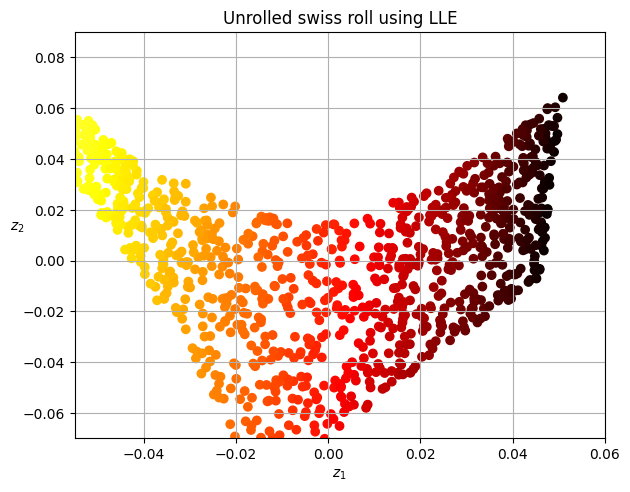

In [35]:
plt.scatter(X_unrolled[:, 0], X_unrolled[:, 1],
            c=t, cmap=darker_hot)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
plt.axis([-0.055, 0.060, -0.070, 0.090])
plt.grid(True)

save_fig("lle_unrolling_plot")
plt.title("Unrolled swiss roll using LLE")
plt.show()

/tmp/ipython-input-37-1925953097.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  darker_hot = cm.get_cmap('hot')


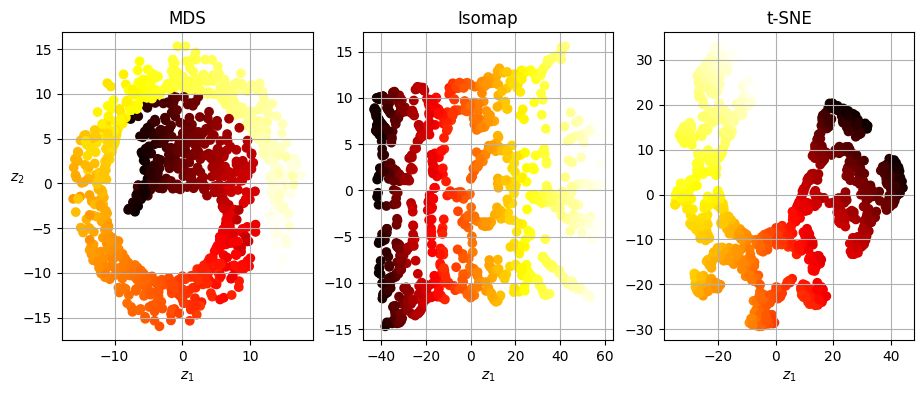

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import MDS, Isomap, TSNE
from matplotlib import cm

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

X_reduced_mds = MDS(n_components=2, random_state=42).fit_transform(X)
X_reduced_isomap = Isomap(n_components=2).fit_transform(X)
X_reduced_tsne = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(X)

darker_hot = cm.get_cmap('hot')

titles = ["MDS", "Isomap", "t-SNE"]

# Plot
plt.figure(figsize=(11, 4))
for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=darker_hot)
    plt.xlabel("$z_1$")
    if subplot == 131:
        plt.ylabel("$z_2$", rotation=0)
    plt.grid(True)

plt.show()


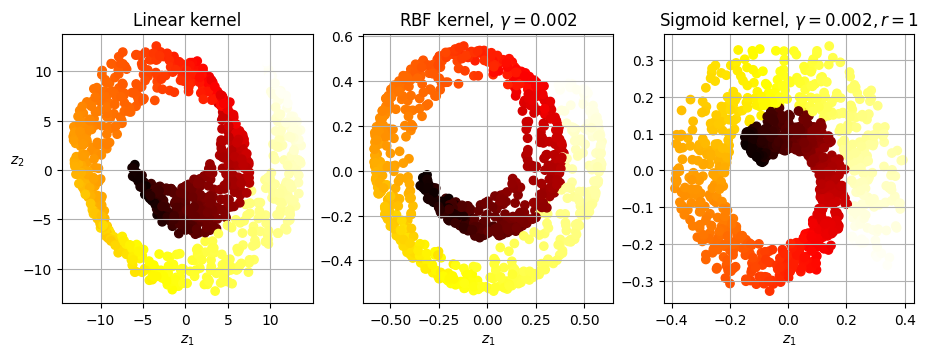

In [38]:
lin_pca = KernelPCA(kernel="linear")
rbf_pca = KernelPCA(kernel="rbf", gamma=0.002)
sig_pca = KernelPCA(kernel="sigmoid", gamma=0.002, coef0=1)

kernel_pcas = ((lin_pca, "Linear kernel"),
               (rbf_pca, rf"RBF kernel, $\gamma={rbf_pca.gamma}$"),
               (sig_pca, rf"Sigmoid kernel, $\gamma={sig_pca.gamma}, r={sig_pca.coef0}$"))

plt.figure(figsize=(11, 3.5))
for idx, (kpca, title) in enumerate(kernel_pcas):
    kpca.n_components = 2
    kpca.random_state = 42
    X_reduced = kpca.fit_transform(X_swiss)

    plt.subplot(1, 3, idx + 1)
    plt.title(title)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=darker_hot)
    plt.xlabel("$z_1$")
    if idx == 0:
        plt.ylabel("$z_2$", rotation=0)
    plt.grid()

plt.show()

# **Exercise solutions**

1. What are the main motivations for reducing a dataset’s dimensionality? What are
the main drawbacks?

Motivasi utama:
* Mengurangi waktu komputasi dan kebutuhan memori
* Mengurangi risiko overfitting
* Mempermudah visualisasi
* Meningkatkan performa model ML

Kekurangan:
* Kehilangan informasi (terutama jika terlalu banyak dimensi dihapus)
* Interpretasi fitur hasil transformasi bisa sulit
* Risiko memilih teknik reduksi yang tidak sesuai

2. What is the curse of dimensionality?

> curse of dimensionalit adalah fenomena ketika data berdimensi tinggi menjadi terlalu jarang atau tidak informatif, sehingga algoritma ML menjadi sulit belajar secara efektif. Semakin tinggi dimensi → volume ruang meningkat eksponensial → data menjadi terlalu "tersebar".

3. Once a dataset’s dimensionality has been reduced, is it possible to reverse the
operation? If so, how? If not, why?

> Sebagian besar teknik (seperti PCA) memungkinkan rekonstruksi aproksimasi dari data asli, tapi tidak sempurna — informasi hilang tidak bisa dikembalikan sepenuhnya.

4. Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?

> PCA hanya efektif untuk struktur linier. Untuk data nonlinier, lebih cocok menggunakan Kernel PCA, t-SNE, atau Isomap.

5. Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained
variance ratio to 95%. How many dimensions will the resulting dataset have?

> tergantung pada struktur data. Bisa jadi 50, 100, atau lainnya, tergantung pada jumlah komponen yang dibutuhkan untuk menjelaskan 95% variasi. Harus dihitung dari explained_variance_ratio_.

6. In what cases would you use vanilla PCA, * Incremental PCA, Randomized PCA,
or Kernel PCA?
* Vanilla PCA: Dataset kecil–menengah, cukup dimuat ke memori.
* Incremental PCA: Dataset besar, gunakan batch.
* Randomized PCA: Komputasi cepat untuk banyak fitur.
* Kernel PCA: Untuk menangkap pola nonlinier dalam data.

7. How can you evaluate the performance of a * * dimensionality reduction algorithm
on your dataset?
* Reconstruction error: Seberapa baik data asli bisa dipulihkan.
* Explained variance ratio: Berapa persen informasi yang dipertahankan.
* Visualisasi (jika ≤3D): Apakah cluster terlihat jelas.
* Kinerja model ML setelah reduksi.

8. Does it make any sense to chain two different dimensionality reduction algo‐
rithms?

> Gunakan PCA untuk kompresi awal → lalu t-SNE untuk visualisasi.
Tapi harus hati-hati: kombinasi yang salah bisa membingungkan atau malah menurunkan kualitas representasi.

